In [131]:
%%capture
from __future__ import division
import numpy as np
import pandas as pd
import scipy.stats as st
import itertools
import math
from collections import Counter, defaultdict
%load_ext autoreload
%autoreload 2

In [562]:
%%capture
import matplotlib as mpl
mpl.use("Agg")
import matplotlib.pylab as plt
#%matplotlib notebook
%matplotlib inline
%load_ext base16_mplrc
%base16_mplrc light solarized
#%base16_mplrc dark solarized
plt.rcParams['grid.linewidth'] = 0
plt.rcParams['figure.figsize'] = (16.0, 10.0)

In [391]:
import scipy.io as sio
import os
import PIL.Image as Image

In [99]:
ade_matdata = sio.loadmat('./ADE20K_2016_07_26/index_ade20k.mat',  struct_as_record=False, squeeze_me=True)
ade_index = ade_matdata['index']

In [104]:
ade_index._fieldnames

['filename',
 'folder',
 'typeset',
 'objectIsPart',
 'objectPresence',
 'objectcounts',
 'objectnames',
 'proportionClassIsPart',
 'scene',
 'wordnet_found',
 'wordnet_level1',
 'wordnet_synset',
 'wordnet_hypernym',
 'wordnet_gloss',
 'wordnet_synonyms',
 'wordnet_frequency']

In [149]:
ade_index.objectcounts.shape

(3148,)

In [570]:
image_df = pd.DataFrame([ade_index.filename, ade_index.folder, ade_index.scene]).T
image_df.columns = ['filename', 'folder', 'scene']

In [580]:
obj_df = pd.DataFrame([ade_index.objectnames, ade_index.objectcounts, ade_index.proportionClassIsPart, ade_index.wordnet_found, ade_index.wordnet_level1, 
                       ade_index.wordnet_synset, ade_index.wordnet_hypernym, ade_index.wordnet_gloss, ade_index.wordnet_synonyms, ade_index.wordnet_frequency]).T
obj_df.columns = ['objectnames', 'objectcounts', 'proportionClassIsPart', 'wordnet_found',
 'wordnet_level1',
 'wordnet_synset',
 'wordnet_hypernym',
 'wordnet_gloss',
 'wordnet_synonyms',
 'wordnet_frequency']

img_obj_df = pd.DataFrame(ade_index.objectPresence).T
img_obj_df.index = image_df['filename']
img_obj_df.columns = obj_df['objectnames']

In [601]:
obj_df[obj_df['wordnet_frequency'] > 10]

,objectnames,objectcounts,proportionClassIsPart,wordnet_found,wordnet_level1,wordnet_synset,wordnet_hypernym,wordnet_gloss,wordnet_synonyms,wordnet_frequency
11,air machine,0,0,1,machine,"machine. device. instrumentality, instrumentat...","[machine, device, instrumentality, instrumenta...",any mechanical or electrical device that trans...,machine,33
28,"animal, animate being, beast, brute, creature,...",533,0,1,"animal, animate being, beast, brute, creature,...","animal, animate being, beast, brute, creature,...","[animal, animate being, beast, brute, creature...",a living organism characterized by voluntary m...,"animal, animate being, beast, brute, creature,...",67
29,animals,0,0,1,"animal, animate being, beast, brute, creature,...","animal, animate being, beast, brute, creature,...","[animal, animate being, beast, brute, creature...",a living organism characterized by voluntary m...,"animal, animate being, beast, brute, creature,...",67
30,antenna,3,1,1,"antenna, aerial, transmitting aerial","antenna, aerial, transmitting aerial. electric...","[antenna, aerial, transmitting aerial, electri...",an electrical device that sends or receives ra...,"antenna, aerial, transmitting aerial",14
31,"antenna, aerial, transmitting aerial",179,0,1,"antenna, aerial, transmitting aerial","antenna, aerial, transmitting aerial. electric...","[antenna, aerial, transmitting aerial, electri...",an electrical device that sends or receives ra...,"antenna, aerial, transmitting aerial",14
36,apparatus,0,0,1,machine,"machine. device. instrumentality, instrumentat...","[machine, device, instrumentality, instrumenta...",any mechanical or electrical device that trans...,machine,33
40,appliance,0,0,1,machine,"machine. device. instrumentality, instrumentat...","[machine, device, instrumentality, instrumenta...",any mechanical or electrical device that trans...,machine,33
53,arm,3887,1,1,arm,"arm. limb. extremity, appendage, member. exter...","[arm, limb, extremity, appendage, member, exte...",a human limb; technically the part of the supe...,arm,104
59,art,0,0,1,"art, fine art","art, fine art. creation. artifact, artefact. w...","[art, fine art, creation, artifact, artefact, ...",the products of human creativity; works of art...,"art, fine art",49
61,articulated lamp,0,0,1,lamp,lamp. source of illumination. device. instrume...,"[lamp, source of illumination, device, instrum...",an artificial source of visible illumination,lamp,12


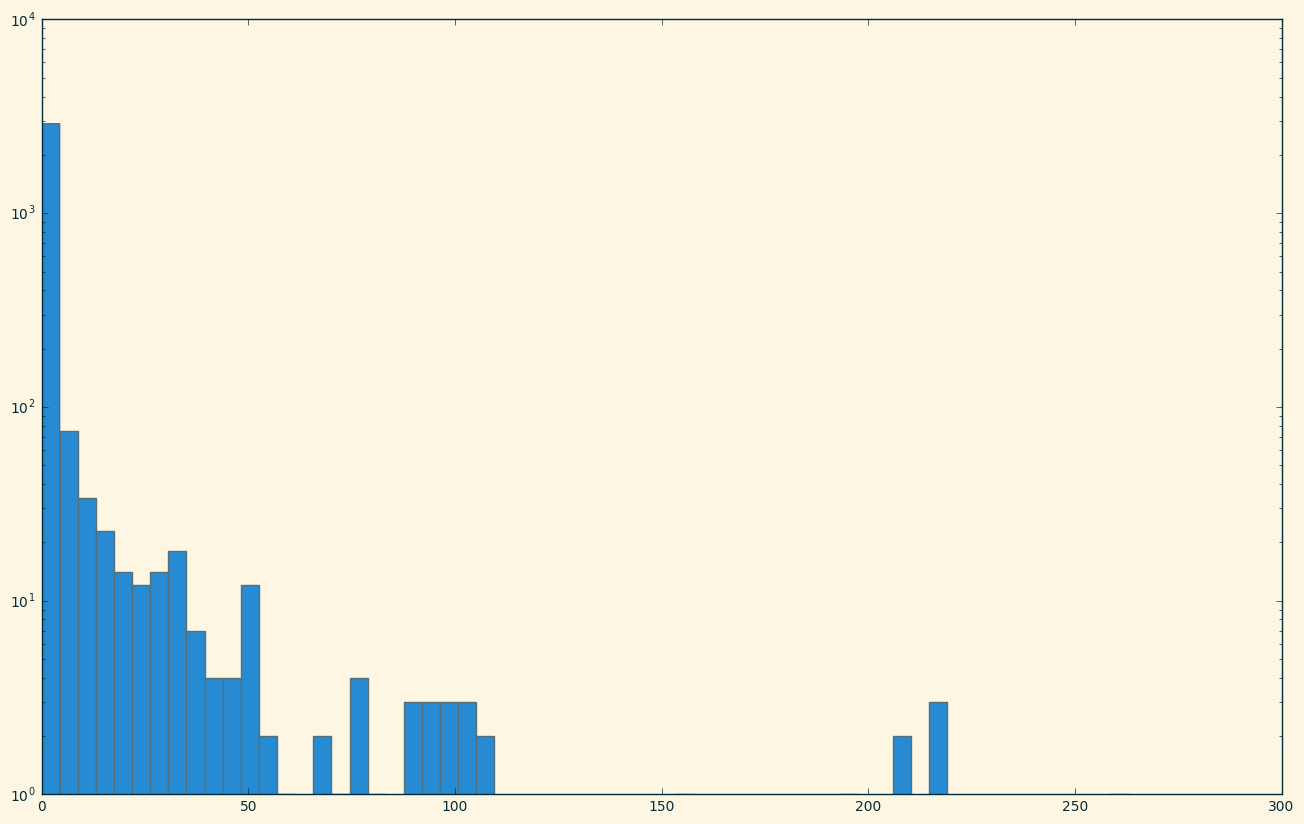

In [594]:
_ = obj_df[obj_df['wordnet_frequency'] < 6000]['wordnet_frequency'].hist(bins = 60, log=True)

In [576]:
primary_obj_df = obj_df[obj_df['proportionClassIsPart'] == 0]

In [577]:
primary_obj_df

,objectnames,objectcounts,proportionClassIsPart
0,-,1,0
1,aarm panel,0,0
2,abacus,1,0
3,"accordion, piano accordion, squeeze box",1,0
4,acropolis,11,0
5,"ad, advertisement, advertizement, advertising,...",71,0
6,adding machine,0,0
7,advertisement board,0,0
9,"air conditioner, air conditioning",582,0
10,air hockey table,0,0


In [387]:
img_obj_df.columns.shape

(3148,)

In [175]:
coarse_scenes = set([sce.split('/')[0] for sce in ade_index.scene.tolist()])

In [177]:
len(coarse_scenes)

720

In [330]:
indoor_words = ['indoor', 'interior', 'home', 'shop', 'office', 'hall', 'store']
outdoor_words = ['outdoor', 'exterior', 'forest', 'street', 'deck', 'garden', 'house', 'park', 'field', 'arena', 'farm', 'bridge']

scenes_by_type = defaultdict(set)
for scene in ade_index.scene.tolist():
    if set(indoor_words).intersection(set([item for sublist in [sc.split('_') for sc in scene.split('/')] for item in sublist])) or 'room' in scene:
        scenes_by_type['indoor'].add(scene)
    elif set(outdoor_words).intersection(set([item for sublist in [sc.split('_') for sc in scene.split('/')] for item in sublist])):
        scenes_by_type['outdoor'].add(scene)
    else:
        scenes_by_type['ambiguous'].add(scene)

In [331]:
for k, v in scenes_by_type.items():
    print(k, len(v))

ambiguous 469
indoor 226
outdoor 177


In [372]:
scenes_by_type

defaultdict(set,
            {'ambiguous': {'abbey',
              'access_road',
              'air_base',
              'airfield',
              'airlock',
              'airplane_cabin',
              'airport/airport',
              'airport/entrance',
              'airport_terminal',
              'airport_ticket_counter',
              'alcove',
              'alley',
              'amphitheater',
              'amusement_arcade',
              'anechoic_chamber',
              'aquarium',
              'aquatic_theater',
              'aqueduct',
              'arcade',
              'arch',
              'archaelogical_excavation',
              'archive',
              'armory',
              'army_base',
              'art_gallery',
              'art_school',
              'art_studio',
              'artists_loft',
              'assembly_line',
              'atrium/public',
              'attic',
              'auditorium',
              'auto_factory',
              'a

In [375]:
scene_assignments = {}
for stype, scene_cats in scenes_by_type.items():
    for scene_cat in scene_cats:
        scene_assignments[scene_cat] = stype

In [377]:
scenes_by_type.keys()

dict_keys(['ambiguous', 'indoor', 'outdoor'])

In [381]:
in_out_counts = defaultdict(int)
for scene in ade_index.scene.tolist():
    in_out_counts[scene_assignments[scene]] += 1

In [382]:
in_out_counts

defaultdict(int, {'ambiguous': 10805, 'indoor': 7028, 'outdoor': 4377})

In [324]:
word_pieces = []
for scene in scenes_by_type['ambiguous']:
    word_pieces.extend([item for sublist in [sc.split('_') for sc in scene.split('/')] for item in sublist])

In [559]:
obj_counts = img_obj_df.sum(axis=1)

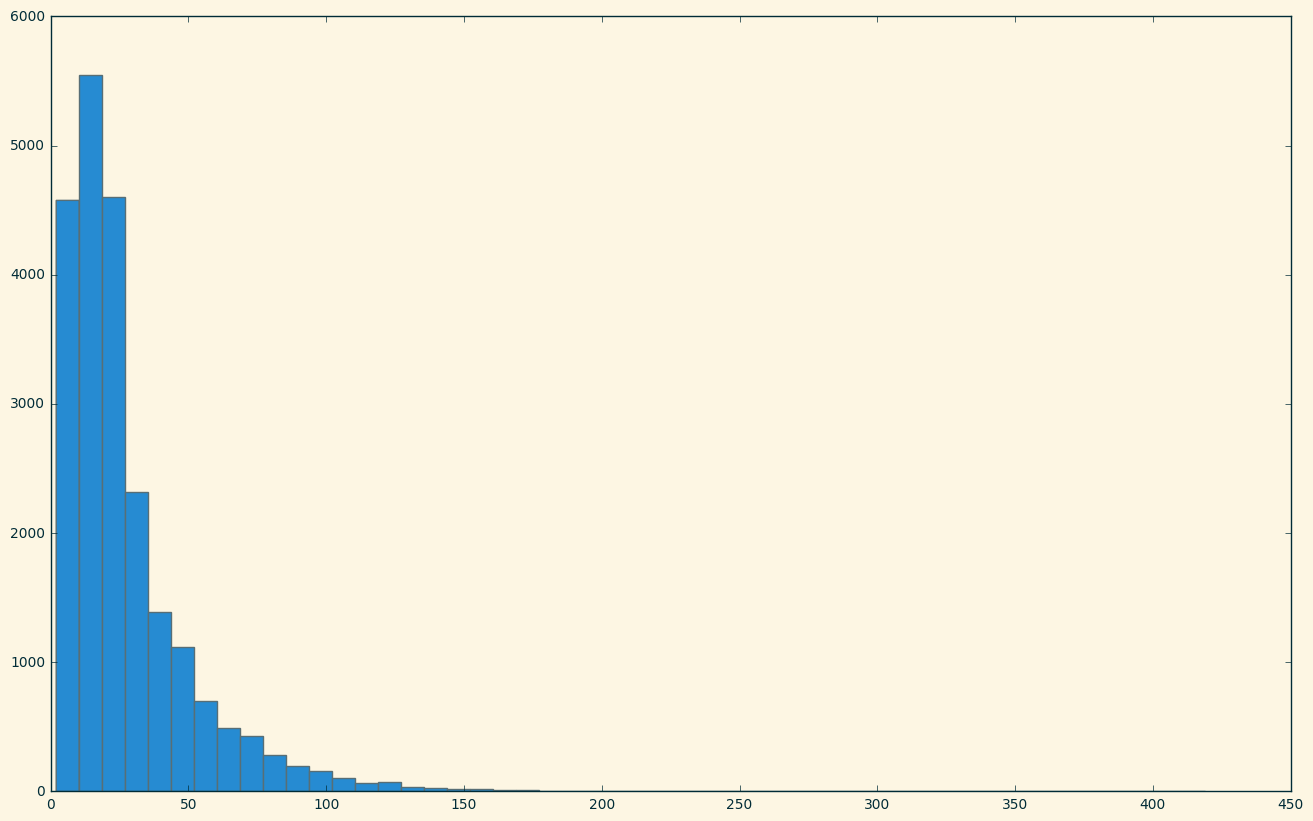

In [568]:
_ = obj_counts.hist(bins=50)

In [338]:
obj_df['objectnames'].values.tolist()

['-',
 'aarm panel',
 'abacus',
 'accordion, piano accordion, squeeze box',
 'acropolis',
 'ad, advertisement, advertizement, advertising, advertizing, advert',
 'adding machine',
 'advertisement board',
 'aerial',
 'air conditioner, air conditioning',
 'air hockey table',
 'air machine',
 'aircraft carrier',
 'airplane, aeroplane, plane',
 'airport cart',
 'alarm',
 'alarm clock',
 'alembic',
 'alga',
 'algae',
 "altar, communion table, Lord's table",
 'altarpiece',
 'amphitheater',
 'amphora',
 'anchor',
 'andiron',
 'andirons',
 'animal toy',
 'animal, animate being, beast, brute, creature, fauna',
 'animals',
 'antenna',
 'antenna, aerial, transmitting aerial',
 'antler',
 'antlers',
 'anvil',
 'aperture',
 'apparatus',
 'apparel, wearing apparel, dress, clothes',
 'apple',
 'apples',
 'appliance',
 'apron',
 'aquarium',
 'aqueduct',
 'arbor',
 'arcade',
 'arcade machine',
 'arcade machines',
 'arcade, colonnade',
 'arcades',
 'arch',
 'arch, archway',
 'arches',
 'arm',
 'arm pane

In [355]:
q_cat_defs = {
    'vol_cats': ['glass, drinking glass', 'mug', 'bowl', 'bottle', 'box', 'bucket, pail', 'can, tin, tin can', 'container', 'jar'],
    'openable_cats': ['chest of drawers, chest, bureau, dresser', 'cabinet'],
    'surface_cats': ['coffee table, cocktail table', 'bench', 'counter', 'countertop', 'shelf', 'table']
    }

In [365]:
tot_objs = obj_df.sum()[1]

In [384]:
for qt, cats in q_cat_defs.items():
    obj_count = obj_df[obj_df['objectnames'].isin(cats)].sum()[1]
    print(qt, int(obj_count))

vol_cats 13844
openable_cats 8126
surface_cats 14550


In [569]:
obj_df

,objectnames,objectcounts
0,-,1
1,aarm panel,0
2,abacus,1
3,"accordion, piano accordion, squeeze box",1
4,acropolis,11
5,"ad, advertisement, advertizement, advertising,...",71
6,adding machine,0
7,advertisement board,0
8,aerial,1
9,"air conditioner, air conditioning",582


In [513]:
def get_ade_image(image_df, ade_pre = '.', setting=None, obj_categories=None):
    global img_n
    found = False
    while not found:
        img_row_to_load = np.random.randint(0, image_df.shape[0])
        img_n = img_row_to_load
        image_path = os.path.join(ade_pre, image_df.iloc[img_row_to_load]['folder'], image_df.iloc[img_row_to_load]['filename'])
        img_to_disp = Image.open(image_path)
        if not setting:
            found = 'True'
        elif image_df.iloc[img_row_to_load]['setting'] == setting:
            found = 'True'
        else:
            pass
    return img_to_disp

In [490]:
image_df['setting'] = image_df['scene'].apply(lambda x: scene_assignments[x])

In [414]:
import itertools
import random

In [ ]:
get_ade_image(image_df, setting='indoor')

In [552]:
test_image_objects = img_obj_df.iloc[img_n][img_obj_df.iloc[img_n] != 0].index.tolist()
pruned_test_image_objects = [ob.split(',')[0] for ob in test_image_objects]
object_combos = list(itertools.combinations(pruned_test_image_objects, 2))

for objcts in random.sample(object_combos, 5):
    print('How far is the {} from the {}?'.format(*objcts))

How far is the coffee table from the sky?
How far is the ceiling from the sky?
How far is the chair from the sky?
How far is the railing from the sky?
How far is the coffee table from the painting?


# hide

In [297]:
# pd.Series([sc.split('/')[-1] for sc in ade_index.scene.tolist() if sc.split('/')[0] != sc.split('/')[-1]]).value_counts()